Case Study Analysis: Wearable Fitness Devices

In [4]:
import os
import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import kaggle
import kagglehub
from kagglehub import KaggleDatasetAdapter
import math
from ols_functions import ols_model, remove_correlated_variables

In [5]:
# Download the dataset from Kaggle
# This will download the dataset to a local cache directory
dataset_path = kagglehub.dataset_download("pratyushpuri/wearable-health-devices-performance-analysis")

print(f"Dataset downloaded to: {dataset_path}")

# List files in the downloaded dataset
csv_file = os.listdir(dataset_path)[0]
print(csv_file)

df = pd.read_csv(os.path.join(dataset_path, csv_file))
display(df.columns)
display(df.head())


Dataset downloaded to: /Users/jordan/.cache/kagglehub/datasets/pratyushpuri/wearable-health-devices-performance-analysis/versions/1
wearable_health_devices_performance_upto_26june2025.csv


Index(['Test_Date', 'Device_Name', 'Brand', 'Model', 'Category', 'Price_USD',
       'Battery_Life_Hours', 'Heart_Rate_Accuracy_Percent',
       'Step_Count_Accuracy_Percent', 'Sleep_Tracking_Accuracy_Percent',
       'Water_Resistance_Rating', 'User_Satisfaction_Rating',
       'GPS_Accuracy_Meters', 'Connectivity_Features', 'Health_Sensors_Count',
       'App_Ecosystem_Support', 'Performance_Score'],
      dtype='object')

,Test_Date,Device_Name,Brand,Model,Category,Price_USD,Battery_Life_Hours,Heart_Rate_Accuracy_Percent,Step_Count_Accuracy_Percent,Sleep_Tracking_Accuracy_Percent,Water_Resistance_Rating,User_Satisfaction_Rating,GPS_Accuracy_Meters,Connectivity_Features,Health_Sensors_Count,App_Ecosystem_Support,Performance_Score
0,2025-06-01,Fitbit Inspire 4,Fitbit,Inspire 4,Fitness Tracker,141.74,129.9,89.69,93.03,78.91,3ATM,6.5,NaN,"Bluetooth, WiFi",5,Cross-platform,68.4
1,2025-06-01,Apple Watch SE 3,Apple,Watch SE 3,Smartwatch,834.64,26.5,95.92,98.20,79.76,IP68,8.3,4.9,"WiFi, Bluetooth, NFC",8,iOS,60.1
2,2025-06-01,Fitbit Versa 4,Fitbit,Versa 4,Sports Watch,145.34,161.2,92.24,96.81,74.49,IPX8,6.0,1.7,Bluetooth,7,Cross-platform,59.3
3,2025-06-01,Polar Vantage V3,Polar,Vantage V3,Smartwatch,349.53,69.4,96.77,95.56,78.06,IP68,8.0,3.2,"WiFi, Bluetooth, NFC, LTE",12,Cross-platform,61.0
4,2025-06-01,Samsung Galaxy Watch FE,Samsung,Galaxy Watch FE,Smartwatch,502.43,39.7,92.27,98.15,75.23,IPX8,8.3,1.6,"WiFi, Bluetooth, NFC, LTE",14,Android/iOS,61.2


In [6]:
# Basic EDA
print("Description of the dataset: ")
print(df.describe())
print()
print(f'Number of missing values in the dataset: \n{df.isnull().sum()}')
print()
print(f'Number of duplicated values in the dataset: {df.duplicated().sum()}')
print()
print(f'Number of unique values in the dataset: \n{df.nunique()}')
print()
print(f'Shape of the dataset: {df.shape}')
print()
print("Columns in the dataset: ")
print (df.columns.tolist())


Description of the dataset: 
         Price_USD  Battery_Life_Hours  Heart_Rate_Accuracy_Percent  \
count  2375.000000         2375.000000                  2375.000000   
mean    359.444484          160.584463                    93.483907   
std     215.671035          234.815896                     3.172078   
min      30.000000           18.000000                    85.010000   
25%     211.875000           46.900000                    92.140000   
50%     334.370000           99.800000                    94.070000   
75%     487.930000          177.400000                    95.925000   
max     989.480000         2118.100000                    98.000000   

       Step_Count_Accuracy_Percent  Sleep_Tracking_Accuracy_Percent  \
count                  2375.000000                      2375.000000   
mean                     95.910198                        78.837516   
std                       1.665484                         4.843714   
min                      93.000000             

,Device_Name,Battery_Life_Hours,Price_USD,Performance_Score,User_Satisfaction_Rating,Heart_Rate_Accuracy_Percent,Step_Count_Accuracy_Percent,Sleep_Tracking_Accuracy_Percent,GPS_Accuracy_Meters
0,Fitbit Inspire 4,129.9,141.74,68.4,6.5,89.69,93.03,78.91,NaN
1,Apple Watch SE 3,26.5,834.64,60.1,8.3,95.92,98.20,79.76,4.9
2,Fitbit Versa 4,161.2,145.34,59.3,6.0,92.24,96.81,74.49,1.7
3,Polar Vantage V3,69.4,349.53,61.0,8.0,96.77,95.56,78.06,3.2
4,Samsung Galaxy Watch FE,39.7,502.43,61.2,8.3,92.27,98.15,75.23,1.6
...,...,...,...,...,...,...,...,...,...
2370,Apple Watch Series 10,29.3,582.28,62.8,9.3,95.50,96.02,82.02,3.3
2371,Fitbit Charge 6,108.4,156.48,67.9,6.8,89.27,94.34,75.00,NaN
2372,Apple Watch SE 3,64.6,282.45,60.9,7.3,96.69,98.34,79.44,2.5
2373,Apple Watch Ultra 2,42.6,724.99,61.6,8.4,95.46,97.09,78.99,2.8


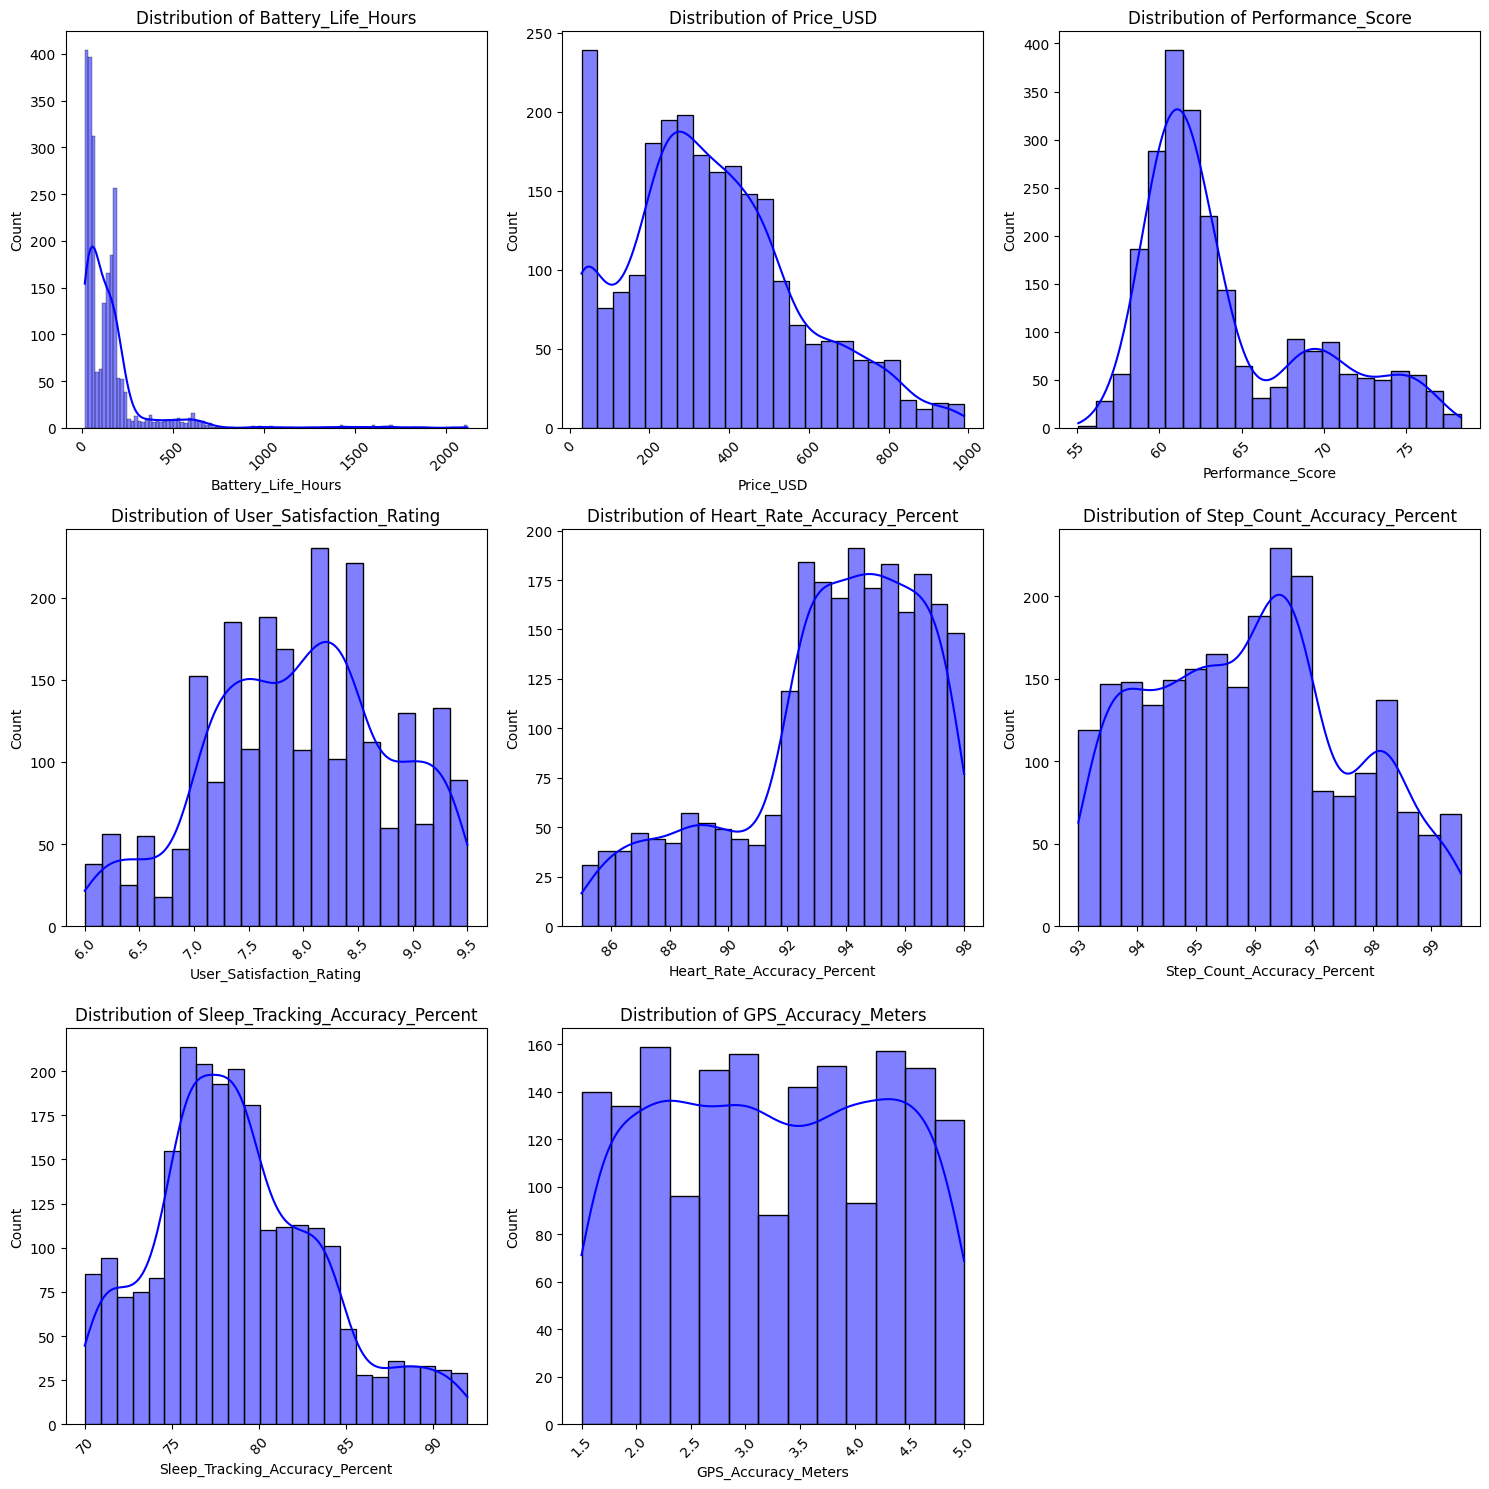

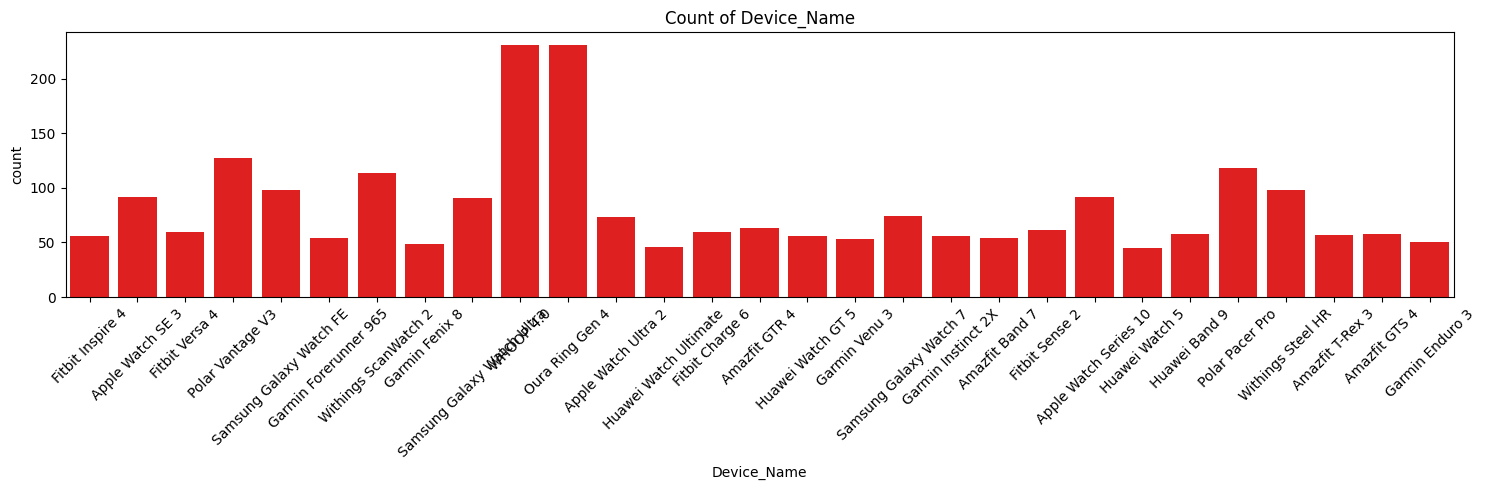

In [7]:
# Plot the distribution of the target variables 
# TODO: Add accuracy metrics & plot the distribution of the target variables 
accuracy_metrics = [value for value in df.columns.tolist() if "Accuracy" in value] 
target_variables = ['Device_Name', 'Battery_Life_Hours', 'Price_USD', 'Performance_Score', 'User_Satisfaction_Rating']
target_variables.extend(accuracy_metrics)

# Convert variables to their respective types
target_df = df[target_variables]
target_variables = target_df.columns.tolist()
display(target_df)
# print(target_df['Battery_Life_Hours'].dtype)
# 1. Plot the distribution/count of target variables (either using histogram or barplot)
numerical_vars = [variable for variable in target_variables if np.issubdtype(target_df[variable].dtype, np.number)]
categorical_vars = [variable for variable in target_variables if variable not in numerical_vars]
# Calculate the number of subplots needed
num_numeric_vars = len(numerical_vars)

# Determine nrows and ncols for the grid
n_numeric_cols = math.ceil(math.sqrt(num_numeric_vars))  # Number of columns
n_numeric_rows = math.ceil(num_numeric_vars / n_numeric_cols) # Number of rows

num_cat_vars = len(categorical_vars)

# Determine nrows and ncols for the grid
n_cat_cols = math.ceil(math.sqrt(num_cat_vars))  # Number of columns
n_cat_rows = math.ceil(num_cat_vars / n_cat_cols) # Number of rows


# Plot Numerical
fig, axes = plt.subplots(n_numeric_rows, n_numeric_cols, figsize=(15, 5*n_numeric_rows))
# Ensure axes is always iterable
if isinstance(axes, np.ndarray):  # If axes is an array (multiple subplots)
    axes = axes.flatten()
else:  # If axes is a single Axes object (one subplot)
    axes = [axes]  # Wrap it in a list

for i, variable in enumerate(numerical_vars):
    ax = axes[i] # grab the current row in the axes
    sns.histplot(data=target_df, x=variable, color='blue', kde=True, ax=ax)
    ax.set_title('Distribution of ' + variable)
    ax.set_xlabel(variable)
    ax.tick_params(axis='x', rotation=45) 
  

# Hide the unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

# Plot categorical
fig, axes = plt.subplots(n_cat_rows, n_cat_cols, figsize=(15, 5*n_cat_rows))

# Ensure axes is always iterable
if isinstance(axes, np.ndarray):  # If axes is an array (multiple subplots)
    axes = axes.flatten()
else:  # If axes is a single Axes object (one subplot)
    axes = [axes]  # Wrap it in a list

for i, variable in enumerate(categorical_vars):
    ax = axes[i] # set the current axis
    sns.countplot(data=target_df, x=variable, color='red', ax=ax)
    ax.set_title('Count of ' + variable)
    ax.set_xlabel(variable)
    ax.tick_params(axis='x', rotation=45) 

for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()




### PLOT OF BATTERY LIFE VS. PERFORMANCE (RAW) ###


/var/folders/mc/80j622jd5f1g317z7lpps7v00000gn/T/ipykernel_87827/1215148532.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_df['Battery_Type'] = df['Battery_Life_Hours'].apply(categorize_battery_life)


### SEGMENTATION ANALYSIS OF BATTERY LIFE VS. PERFORMANCE & USER SATISFACTION (RAW) ###


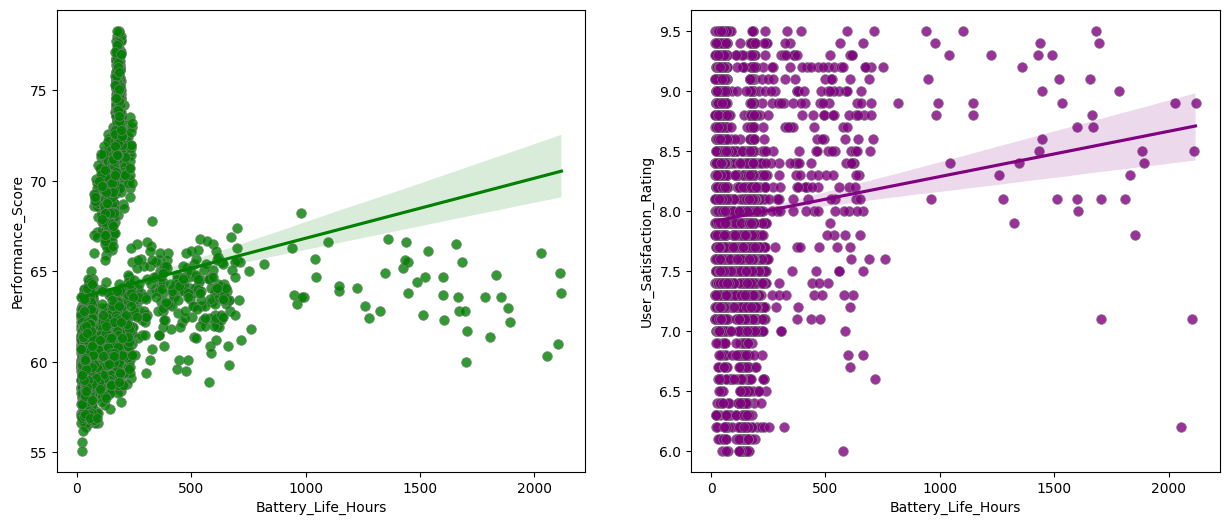

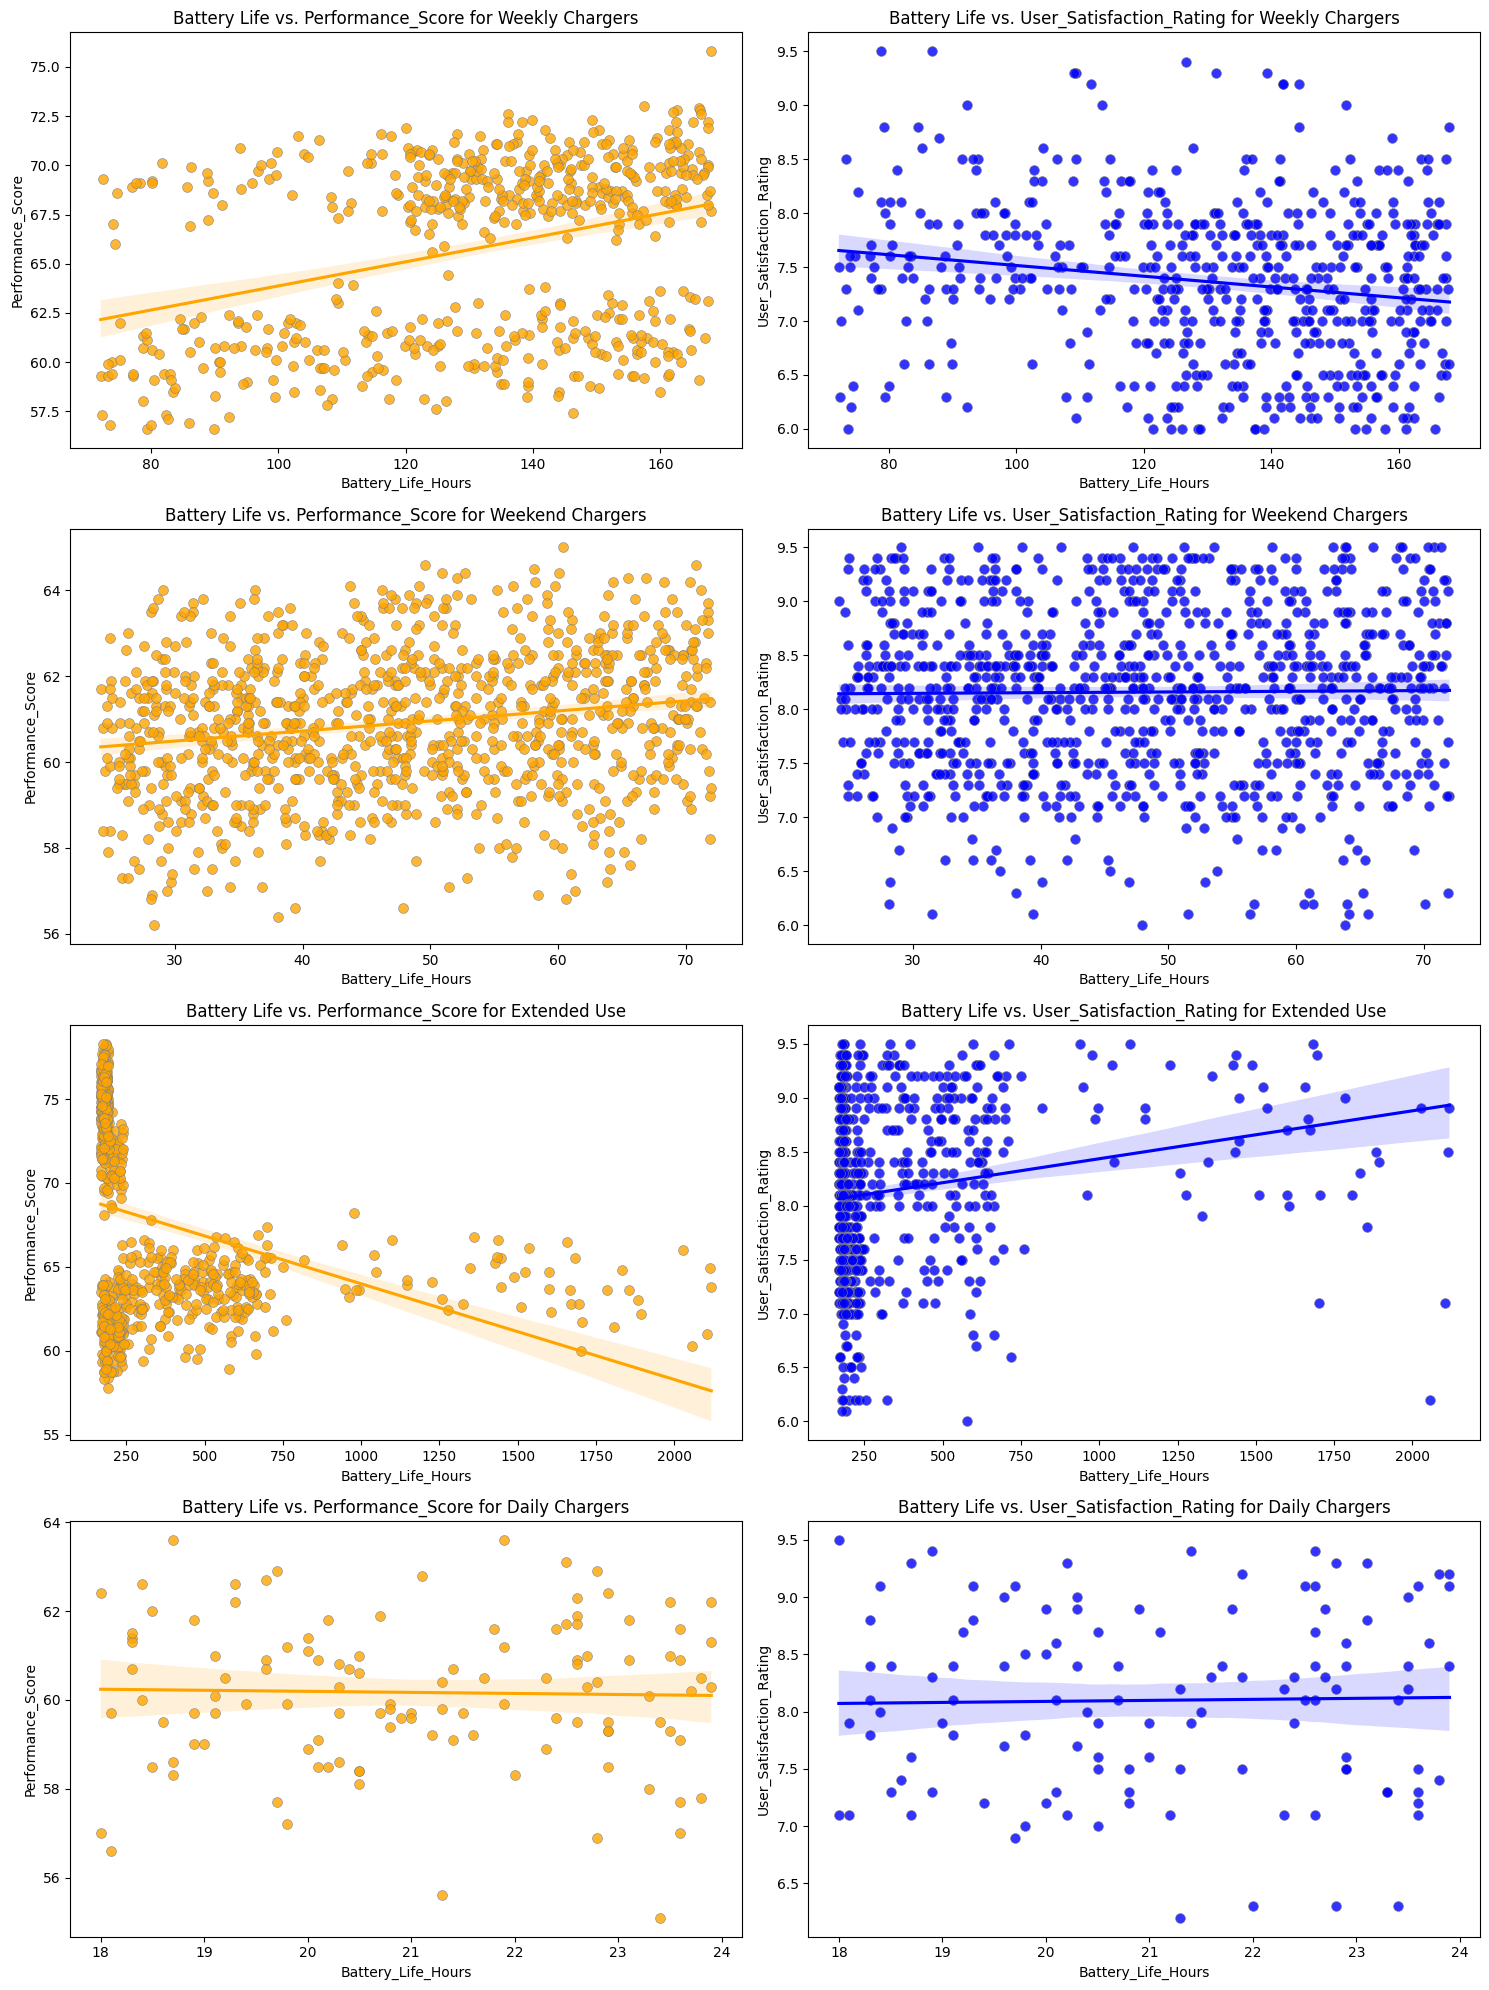

Lower Outlier Bound: -148.85
Upper Outlier Bound: 373.15
### SEGMENTATION ANALYSIS OF BATTERY LIFE VS. PERFORMANCE & USER SATISFACTION (NO OUTLIERS) ###


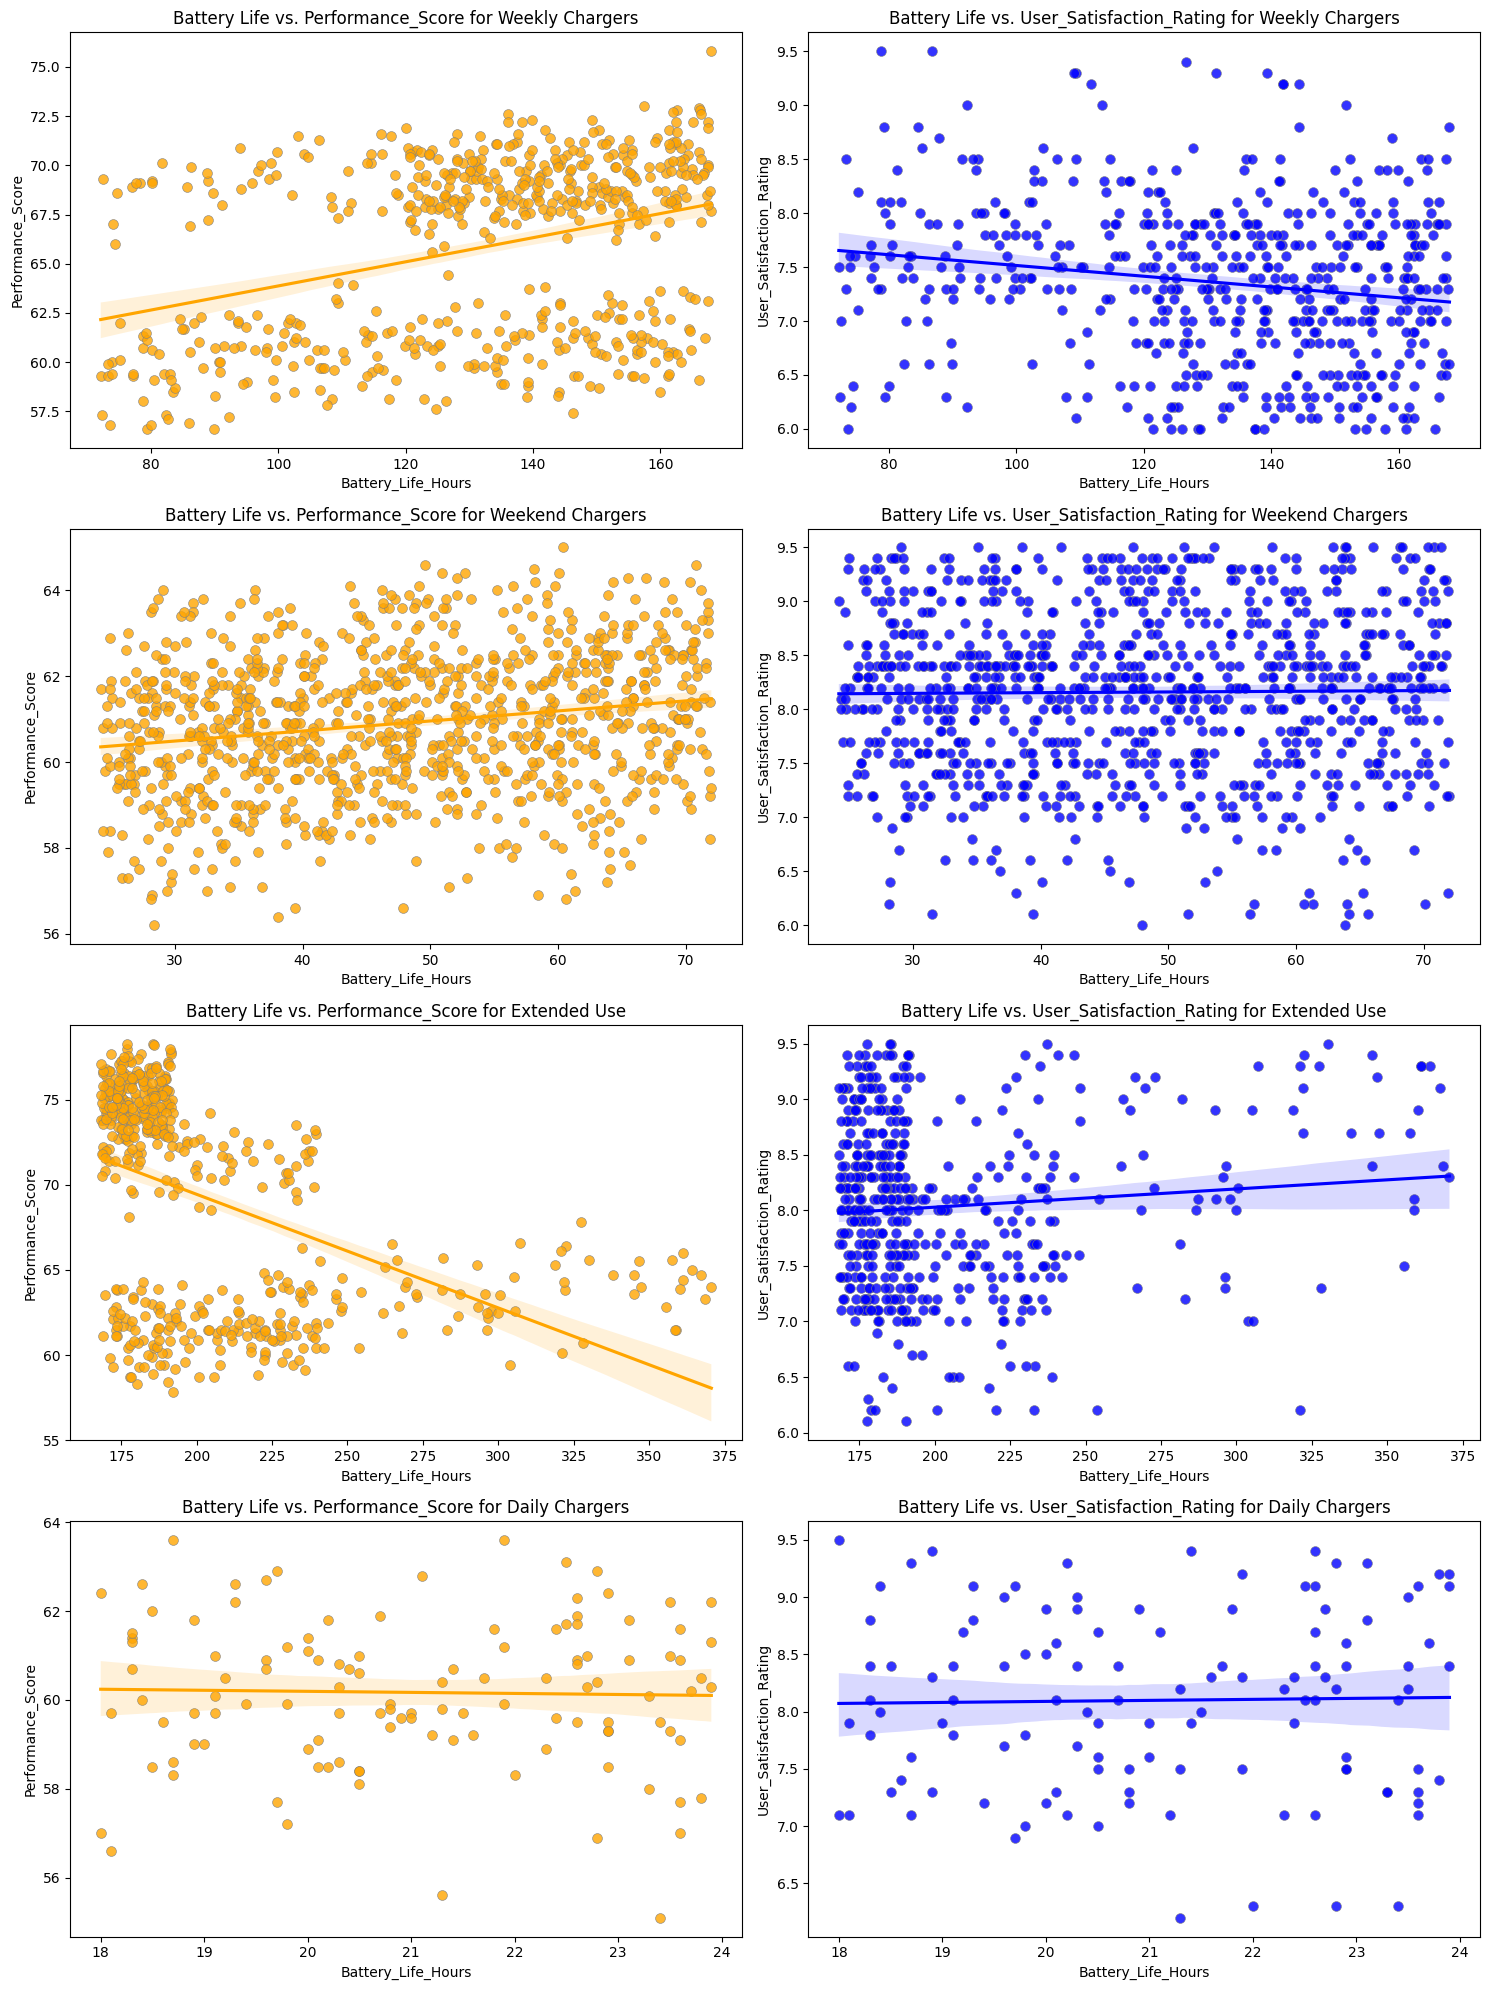

### PLOT OF BATTERY LIFE VS. PERFORMANCE (NO OUTLIERS) ###


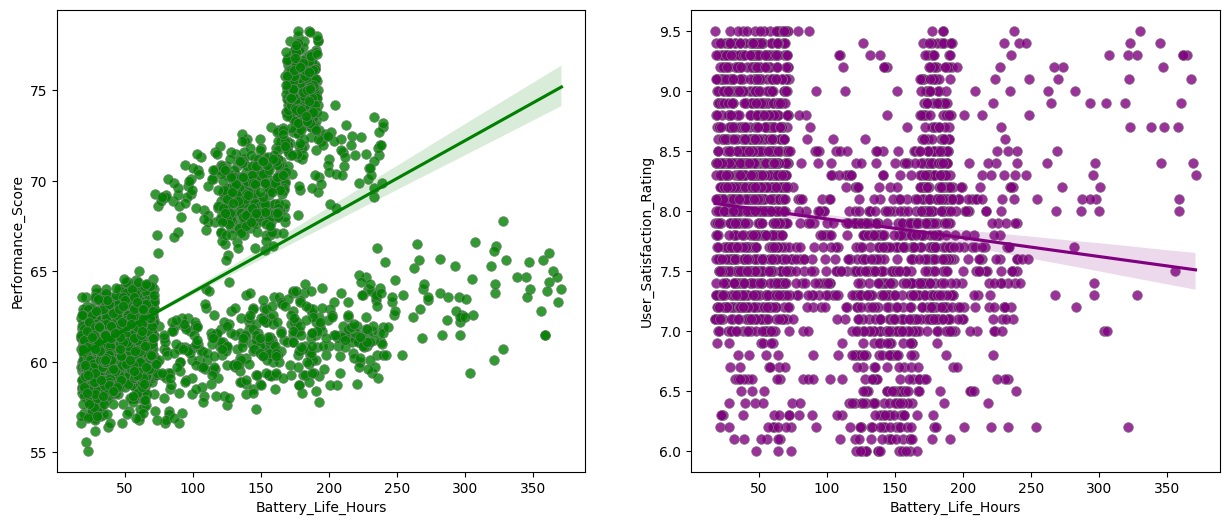

In [8]:
# TODO: Plot battery life against other variables (i.e., performance score and user satisfaction rating)
# Hint: Use scatter plots to plot the relationship. You can also refer to the Tukey and Mostellar's diagram for feature engineering

# Key metrics of interest: health accuracy, battery life, performance score, and user satisfaction
target_df.head()

# Raw scatterplot looking at relationship between battery life and performance
print("### PLOT OF BATTERY LIFE VS. PERFORMANCE (RAW) ###")
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,6))
sns.regplot(data=target_df, 
            x='Battery_Life_Hours', 
            y='Performance_Score', 
            color='green',
            scatter_kws={'edgecolor': 'gray', 'linewidths': 0.5, 's': 50},
            ax=axes[0])
sns.regplot(data=target_df,
            x='Battery_Life_Hours',
            y='User_Satisfaction_Rating',
            color='purple',
            scatter_kws={'edgecolor': 'gray', 'linewidths': 0.5, 's': 50},
            ax=axes[1])

# Segmentation Analysis
### Break apart the battery life into categories (segments) and analyze the relationship within each segment
### Daily chargers (0-24 hours), Weekend Chargers (25-72), Weekly Chargers (73-168), Extended Use (169+)
def categorize_battery_life(hours):
    if hours <= 24:
        return 'Daily Chargers'
    elif hours > 24 and hours <= 72:
        return 'Weekend Chargers'
    elif hours > 72 and hours <= 168:
        return 'Weekly Chargers'
    else: # elif hours > 169:
        return 'Extended Use'

target_df['Battery_Type'] = df['Battery_Life_Hours'].apply(categorize_battery_life)
target_df[['Device_Name', 'Battery_Type']].value_counts()

battery_types = target_df['Battery_Type'].unique().tolist()

def plot_battery_types(df, variables):
    if 'Battery_Type' in df.columns:
        n_types = len(battery_types)
        n_vars = len(variables)
        n_total_plots = n_types * n_vars  # Total number of plots needed
        
        n_cols = 2  # Set a fixed number of columns
        n_rows = math.ceil(n_total_plots / n_cols)

        fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))

        if isinstance(axes, np.ndarray):
            axes = axes.flatten()
        else: 
            axes = [axes]
        colors = ['orange', 'blue']
        plot_index = 0
        for battery_type in battery_types:
            for i, variable in enumerate(variables):
                ax = axes[plot_index]
                plot_df = df[df['Battery_Type'] == battery_type]
                
                color = colors[i % len(colors)]
                
                sns.regplot(data=plot_df, 
                            x='Battery_Life_Hours', 
                            y=variable, 
                            color=color, 
                            ax=ax,
                            scatter_kws={'edgecolor': 'gray', 'linewidths': 0.5, 's': 50})
                ax.set_title(f'Battery Life vs. {variable} for {battery_type}')
                plot_index += 1

        # Hide unused subplots
        for j in range(plot_index, len(axes)):
            axes[j].axis('off')

        plt.tight_layout()
        plt.show()
    else:
        raise ValueError('Dataframe does not contain Battery_Type column')

print("### SEGMENTATION ANALYSIS OF BATTERY LIFE VS. PERFORMANCE & USER SATISFACTION (RAW) ###")

plot_battery_types(target_df, ['Performance_Score', 'User_Satisfaction_Rating'])

# TODO: Since the relationship is pretty skewed due to overly high Battery_Life_Hours, it might be likely that any set of hours > 500 is an input error. 
# TODO: Identify outliers in Battery_Life_Hours and drop them from the dataframe. Create a new dataframe called battery_df

def find_outliers(column):
    if isinstance(column, pd.Series) and np.issubdtype(column.dtype, np.number):
        q1 = column.quantile(q=0.25)
        q3 = column.quantile(q=0.75)

        iqr = q3-q1
        upper_outlier_val = q3 + 1.5 * iqr
        lower_outlier_val = q1 - 1.5 * iqr

        # sns.boxplot(data=column, color='blue')
        print(f'Lower Outlier Bound: {lower_outlier_val}\nUpper Outlier Bound: {upper_outlier_val}')
        return (lower_outlier_val, upper_outlier_val)

    else:
        raise ValueError('Input value is not a numeric array')

# Drop outliers for battery analysis
battery_df = target_df[target_df['Battery_Life_Hours'] < find_outliers(target_df['Battery_Life_Hours'])[1]]

print("### SEGMENTATION ANALYSIS OF BATTERY LIFE VS. PERFORMANCE & USER SATISFACTION (NO OUTLIERS) ###")
plot_battery_types(battery_df, ['Performance_Score', 'User_Satisfaction_Rating'])

print("### PLOT OF BATTERY LIFE VS. PERFORMANCE (NO OUTLIERS) ###")
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,6))
sns.regplot(data=battery_df, 
            x='Battery_Life_Hours', 
            y='Performance_Score', 
            color='green',
            scatter_kws={'edgecolor': 'gray', 'linewidths': 0.5, 's': 50},
            ax=axes[0])
sns.regplot(data=battery_df, 
            x='Battery_Life_Hours', 
            y='User_Satisfaction_Rating', 
            color='purple',
            scatter_kws={'edgecolor': 'gray', 'linewidths': 0.5, 's': 50},
            ax=axes[1])
plt.show()




In [9]:
# TODO: Product Focused: Analyze the leading wearable health devices from Oura, Apple, Garmin, and Whoop. Identify potential reasons for their discrepancies
# in user satisfaction, if they exist. Highlight notable differences in accuracy, price, and battery health.

product_df = battery_df[battery_df['Device_Name'].str.contains('Apple|Oura|Garmin|WHOOP', na=False)]
display(product_df.shape)
display(product_df.head())  

# Create a new column assigning the brand to the device
product_df['Brand'] = product_df['Device_Name'].str.split(' ').str[0]

brand_df = product_df.groupby('Brand').agg({'Battery_Life_Hours': 'mean', 
                               'User_Satisfaction_Rating': 'mean', 
                               'Price_USD': 'mean', 
                               'Device_Name': 'count'})

product_grouped_df = product_df.groupby('Device_Name').agg({'Battery_Life_Hours': 'mean', 
                               'User_Satisfaction_Rating': 'mean', 
                               'Price_USD': 'mean', 
                               'Device_Name': 'count'})
display(product_grouped_df)
print()
display(brand_df)




(782, 10)

,Device_Name,Battery_Life_Hours,Price_USD,Performance_Score,User_Satisfaction_Rating,Heart_Rate_Accuracy_Percent,Step_Count_Accuracy_Percent,Sleep_Tracking_Accuracy_Percent,GPS_Accuracy_Meters,Battery_Type
1,Apple Watch SE 3,26.5,834.64,60.1,8.3,95.92,98.20,79.76,4.9,Weekend Chargers
5,Garmin Forerunner 965,287.4,402.32,63.6,8.1,92.85,99.34,77.58,2.3,Extended Use
9,WHOOP 4.0,120.7,30.00,67.1,6.1,91.48,94.79,73.71,NaN,Weekly Chargers
10,Oura Ring Gen 4,178.3,415.05,75.9,8.7,89.34,93.41,89.56,NaN,Extended Use
12,Apple Watch Ultra 2,26.1,756.15,61.9,9.2,92.68,96.44,81.79,3.6,Weekend Chargers


/var/folders/mc/80j622jd5f1g317z7lpps7v00000gn/T/ipykernel_87827/1882133438.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_df['Brand'] = product_df['Device_Name'].str.split(' ').str[0]


,Battery_Life_Hours,User_Satisfaction_Rating,Price_USD,Device_Name
Device_Name,,,,
Apple Watch SE 3,43.285870,8.400000,524.319674,92
Apple Watch Series 10,44.323913,8.376087,515.947174,92
Apple Watch Ultra 2,44.498630,8.452055,537.370274,73
Garmin Fenix 8,311.345455,8.109091,477.010000,11
Garmin Forerunner 965,308.780000,8.466667,548.777333,15
Garmin Instinct 2X,295.133333,8.480000,645.369333,15
Garmin Venu 3,299.581818,8.463636,601.722727,22
Oura Ring Gen 4,179.987013,8.300000,426.072987,231
WHOOP 4.0,143.756277,7.016450,30.000000,231


,Battery_Life_Hours,User_Satisfaction_Rating,Price_USD,Device_Name
Brand,,,,
Apple,44.001946,8.406226,525.029494,257
Garmin,302.766667,8.406349,577.733492,63
Oura,179.987013,8.300000,426.072987,231
WHOOP,143.756277,7.016450,30.000000,231


Based on the grouped dataframe, we can see that there is not much of a discrepancy between user satisfaction of devices from Apple, Garmin, and Oura. However, there is a big dropoff with WHOOP. This leads us to believe that there is something about WHOOP that causes its users to be less satisfied than the other brands. 

Moving forward, let's look into ALL brands in this dataset instead of the most commonly talked about ones in 2025.

In [10]:
# TODO: Repeat the analysis you did in the code cell above except you now must look into ALL BRANDS and DEVICES

# Create a new column assigning the brand to the device
df['Brand'] = df['Device_Name'].str.split(' ').str[0]

all_brand_df = df.groupby('Brand').agg({'Battery_Life_Hours': 'mean', 
                               'User_Satisfaction_Rating': 'mean', 
                               'Price_USD': 'mean', 
                               'Device_Name': 'count'}).sort_values(['User_Satisfaction_Rating', 'Price_USD'])

all_grouped_df = df.groupby('Device_Name').agg({'Battery_Life_Hours': 'mean', 
                               'User_Satisfaction_Rating': 'mean', 
                               'Price_USD': 'mean', 
                               'Device_Name': 'count'}).sort_values(['User_Satisfaction_Rating', 'Price_USD'])
display(all_grouped_df)
print()
display(all_brand_df)

,Battery_Life_Hours,User_Satisfaction_Rating,Price_USD,Device_Name
Device_Name,,,,
WHOOP 4.0,143.756277,7.016450,30.000000,231
Amazfit GTS 4,92.134483,7.282759,172.801552,58
Fitbit Versa 4,114.510000,7.326667,211.209833,60
Amazfit T-Rex 3,102.914035,7.329825,184.264035,57
Amazfit GTR 4,101.890476,7.339683,182.440952,63
Amazfit Band 7,149.235185,7.372222,177.412963,54
Fitbit Sense 2,100.978689,7.380328,195.111967,61
Fitbit Inspire 4,155.967857,7.421429,217.629286,56
Fitbit Charge 6,161.186667,7.426667,196.820167,60


,Battery_Life_Hours,User_Satisfaction_Rating,Price_USD,Device_Name
Brand,,,,
WHOOP,143.756277,7.016450,30.000000,231
Amazfit,110.722845,7.330603,179.308707,232
Fitbit,132.640084,7.388186,204.940380,237
Polar,93.729796,8.023673,341.820531,245
Withings,104.575943,8.048113,352.278679,212
Huawei,46.591220,8.264390,467.052439,205
Oura,179.987013,8.300000,426.072987,231
Samsung,44.885171,8.339924,440.563308,263
Apple,44.001946,8.406226,525.029494,257


Based on these dataframes, it seems as though battery life and price also increase alongside the user satisfaction rating with some exceptions (brands like apple and samsung). Let's dive deeper into this and create a correlation matrix.

<Axes: >

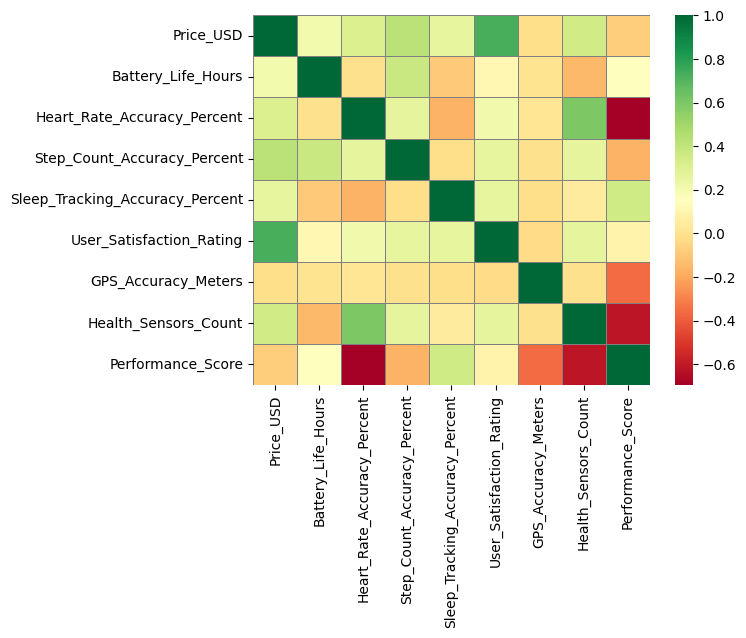

In [11]:
# Create a correlation matrix for the general dataframe
correlation_matrix = df.corr(method='pearson', numeric_only=True)

sns.heatmap(data=correlation_matrix, cmap='RdYlGn', linecolor='gray', linewidths=0.5)

Based on the correlation matrix above, we see some values have negative correlations to performance score that we would not have assumed.

Let's complete the main purpose of this project, to identify the variables that contribute the most to user satisfaction. Let's create some feature sets and test those using OLS models and their corresponding R^2 score. Let's first look into battery life.
1. Quantify the Battery-Satisfaction Relationship

- Determine the statistical correlation between battery life and user satisfaction
Identify the "battery anxiety threshold" where satisfaction drops significantly
Establish whether there's a point of diminishing returns for battery improvements

In [12]:
# TODO Case Study Emphasis 1: The Battery Life Dilemma
# For each device, look into the battery life numbers
battery_corr = df.corr(numeric_only=True).loc['Battery_Life_Hours','User_Satisfaction_Rating']
print(f'Correlation coefficient between battery life and user performance: {round(battery_corr, 2)}')

Correlation coefficient between battery life and user performance: 0.11


Doesn't seem like there is much of a correlation between battery life and user performance alone. This immediately tells us that battery life is not the main/only indicator of User Satisfaction. Looking at the correlation heatmap, let's create an OLS model testing ONLY GREEN variables and calculate its R^2 value. This will later be updated with the values we find contribute most to the R^2 value later. 

In [21]:
# Identify features of interest and test them using ols_model
features = ['Price_USD', 'Heart_Rate_Accuracy_Percent', 'Battery_Life_Hours',
            'Step_Count_Accuracy_Percent', 'Sleep_Tracking_Accuracy_Percent', 
            'Health_Sensors_Count', 'Brand', 'Model', 'Category', 'GPS_Accuracy_Meters', 
            'Water_Resistance_Rating', 'App_Ecosystem_Support', 'Performance_Score'] # test multiple features and collect their R^2 score. Test only numerical variables
ols_model(x=df[features], y=df['User_Satisfaction_Rating'], return_details=True)

x is a Dataframe


,Price_USD,Heart_Rate_Accuracy_Percent,Battery_Life_Hours,Step_Count_Accuracy_Percent,Sleep_Tracking_Accuracy_Percent,Health_Sensors_Count,Brand,Model,Category,GPS_Accuracy_Meters,Water_Resistance_Rating,App_Ecosystem_Support,Performance_Score,Brand_encoded,Model_encoded,Category_encoded,Water_Resistance_Rating_encoded,App_Ecosystem_Support_encoded
1,834.64,95.92,26.5,98.20,79.76,8,Apple,Watch SE 3,Smartwatch,4.9,IP68,iOS,60.1,1,20,0,2,2
2,145.34,92.24,161.2,96.81,74.49,7,Fitbit,Versa 4,Sports Watch,1.7,IPX8,Cross-platform,59.3,2,17,1,3,1
3,349.53,96.77,69.4,95.56,78.06,12,Polar,Vantage V3,Smartwatch,3.2,IP68,Cross-platform,61.0,5,15,0,2,1
4,502.43,92.27,39.7,98.15,75.23,14,Samsung,Galaxy Watch FE,Smartwatch,1.6,IPX8,Android/iOS,61.2,6,7,0,3,0
5,402.32,92.85,287.4,99.34,77.58,11,Garmin,Forerunner 965,Smartwatch,2.3,5ATM,Cross-platform,63.6,3,3,0,1,1


{'model': LinearRegression(),
 'train_r2': 0.8562559077174062,
 'test_r2': 0.8307454772319304,
 'train_rmse': np.float64(0.30029852432878323),
 'test_rmse': np.float64(0.309857843230781)}

These variables seem to explain a lot of the variance between User_Satisfaction_Rating. However, it seems like we are missing a lot of categorical variables that could still contribute to user satisfaction. Let's encode the categorical variables and look into multi-collinearity and remove the variables that contribute to it.

REMOVE HIGHLY CORRELATED VARIABLES


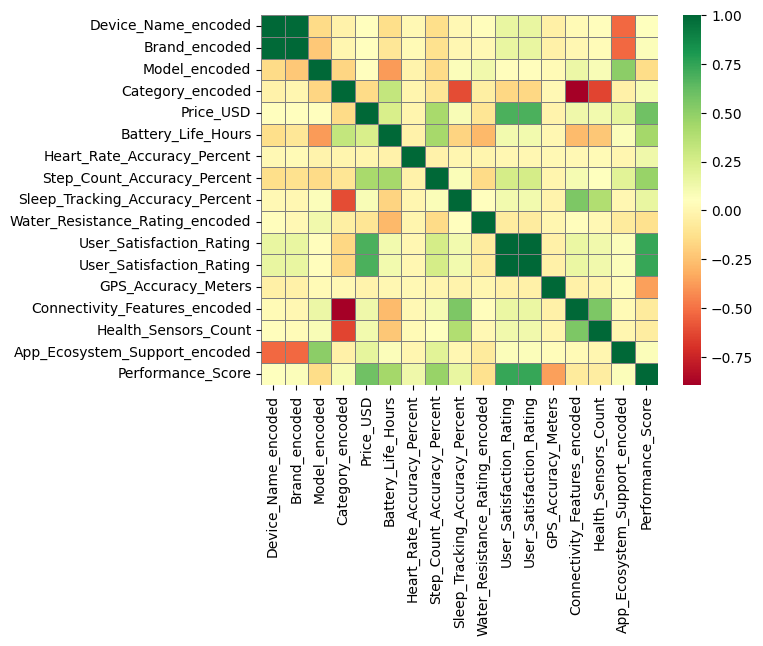

Correlation threshold: 0.8
Variables removed: 3
Variables remaining: 13

Removed pairs:
   Removed Device_Name (kept Brand) - correlation: 0.990
   Removed Connectivity_Features (kept Category) - correlation: -0.892
   Removed User_Satisfaction_Rating (kept User_Satisfaction_Rating) - correlation: 1.000

Final feature set:
   - Brand
   - Model
   - Category
   - Price_USD
   - Battery_Life_Hours
   - Heart_Rate_Accuracy_Percent
   - Step_Count_Accuracy_Percent
   - Sleep_Tracking_Accuracy_Percent
   - Water_Resistance_Rating
   - GPS_Accuracy_Meters
   - Health_Sensors_Count
   - App_Ecosystem_Support
   - Performance_Score
x is a Dataframe
Data appears to be already encoded, using as-is


,Brand_encoded,Model_encoded,Category_encoded,Price_USD,Battery_Life_Hours,Heart_Rate_Accuracy_Percent,Step_Count_Accuracy_Percent,Sleep_Tracking_Accuracy_Percent,Water_Resistance_Rating_encoded,GPS_Accuracy_Meters,Health_Sensors_Count,App_Ecosystem_Support_encoded,Performance_Score
1,1,20,0,834.64,26.5,95.92,98.20,79.76,2,4.9,8,2,60.1
2,2,17,1,145.34,161.2,92.24,96.81,74.49,3,1.7,7,1,59.3
3,5,15,0,349.53,69.4,96.77,95.56,78.06,2,3.2,12,1,61.0
4,6,7,0,502.43,39.7,92.27,98.15,75.23,3,1.6,14,0,61.2
5,3,3,0,402.32,287.4,92.85,99.34,77.58,1,2.3,11,1,63.6



Model performance after removing correlated variables:
model: LinearRegression()
train_r2: 0.856255907717406
test_r2: 0.8307454772319333
train_rmse: 0.30029852432878346
test_rmse: 0.3098578432307784


In [14]:
# Address multi-collinearity and only keep uncorrelated/lightly correlated variables
final_features, r2_a = remove_correlated_variables(df, df.drop(columns='Test_Date').columns.tolist(), 'User_Satisfaction_Rating')

In [17]:
print("\nBased on our final analysis, we believe that the biggest contributors to user satisfaction are:")

for i, feature in enumerate(final_features):
    print(f' {i+1}. {feature}')

print()

for i, feature in enumerate(final_features):
    if str(feature).endswith('_encoded'):
        feature = str(feature).replace('_encoded', '')
    print(f'{feature} R2 Score: {ols_model(df[feature], df['User_Satisfaction_Rating'])}\n')


Based on our final analysis, we believe that the biggest contributors to user satisfaction are:
 1. Brand_encoded
 2. Model_encoded
 3. Category_encoded
 4. Price_USD
 5. Battery_Life_Hours
 6. Heart_Rate_Accuracy_Percent
 7. Step_Count_Accuracy_Percent
 8. Sleep_Tracking_Accuracy_Percent
 9. Water_Resistance_Rating_encoded
 10. GPS_Accuracy_Meters
 11. Health_Sensors_Count
 12. App_Ecosystem_Support_encoded
 13. Performance_Score

x is a Series
Series contains categorical data, encoding...
Converted Series to DataFrame with shape (2375, 1)
Brand R2 Score: -0.010129310726298746

x is a Series
Series contains categorical data, encoding...
Converted Series to DataFrame with shape (2375, 1)
Model R2 Score: 0.033526327752584906

x is a Series
Series contains categorical data, encoding...
Converted Series to DataFrame with shape (2375, 1)
Category R2 Score: 0.08799556657262475

x is a Series
Series contains numerical data, using as-is
Converted Series to DataFrame with shape (2375, 1)
Pric

From this list of features, we now understand that the brand, model, category, price, battery life, accuracy, performance, and ecosystem explain most of the variance in user satisfaction.